# get image description from gpt4

In [21]:
import json
import os
import numpy as np
from PIL import Image
from openai import OpenAI

In [2]:
%run _get_key.py

# get inference result from gpt4

In [3]:
client = OpenAI(api_key=os.environ.get('API_KEY'))

default_prompt = """
Assuming you are a store assistant please analyze the item in the picture.
 Only return the data in a json with the keys shape, dominant_colors, style, description, material, suggested_title, theme. 
 Please restrict the product description to 100 words. 
 For theme please return any special characteristics like nature, geometric, abstract etc. 
"""


def get_openai_opinion(url: str, image_capture_prompt=default_prompt) -> dict:
    print(f'Sending request for {url}')
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": image_capture_prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": url,
                        },
                    },
                ],
            }
        ],
        max_tokens=400,
    )
    print('Received response')
    json_resp = response.choices[0].message.content
    tokens_used = response
    try:
        # print(f'Processing content {json_resp}')
        json_resp = json_resp.replace('```json', '').replace('```', '')
        data = json.loads(json_resp)
        # print(f'Response obtained: {data}')
        return data
    except Exception as e:
        print('Error calling openai', e)
        return dict()

In [4]:
repo = 'https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/'

res = {}
failed = {}
for file in os.listdir('rug_jpeg'):
    url =  repo + file
    print('\n', file)
    try:
        data = get_openai_opinion(url)
        res[file] = data
    except Exception as e:
        print(f'{file} failed')
        failed[file] = e

res


 9701 ARIANA TRIBAL 2.9 X 11.9.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/9701 ARIANA TRIBAL 2.9 X 11.9.jpeg
Received response

 Astro Plum.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Astro Plum.jpeg
Received response

 Dune.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Dune.jpeg
Dune.jpeg failed

 Circles – Blue.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Circles – Blue.jpeg
Circles – Blue.jpeg failed

 17627 VINTAGE  5.8 X 8.5..jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/17627 VINTAGE  5.8 X 8.5..jpeg
Received response

 8623 – Grass.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/8623 – Grass.jpeg
Received response

 17630 VINTAGE  4.5 X 6.3.jpeg
Sending request for https://raw.githubusercontent.co

{'9701 ARIANA TRIBAL 2.9 X 11.9.jpeg': {'shape': 'rectangle',
  'dominant_colors': ['red', 'blue', 'cream', 'beige', 'black'],
  'style': 'traditional',
  'description': 'This is a traditional handwoven rug featuring intricate designs, with a central medallion and border patterns. The craftsmanship suggests it could be of Persian origin, with elaborate floral motifs and possibly wool material.',
  'material': 'wool',
  'suggested_title': 'Traditional Persian-style Handwoven Wool Runner Rug',
  'theme': 'ethnic, floral, geometric'},
 'Astro Plum.jpeg': {'shape': 'rectangle',
  'dominant_colors': ['light grey', 'pastel pink'],
  'style': 'contemporary',
  'description': 'This is a contemporary rectangular area rug with an abstract pattern. The design features a pastel pink pattern over a light grey backdrop. It appears soft and is likely suited for a modern interior space, adding a subtle splash of color and a touch of elegance.',
  'material': 'likely synthetic or wool blend',
  'sugges

# analyze the inference result

In [18]:
print(f"# of successful inference: {len(res)}")
print(f"# of failed inference:     {len(failed)}")
perc_success= np.round(len(res)/(len(failed) + len(res)),2)
print(f"% of successful inference: {perc_success}")

# of successful inference: 138
# of failed inference:     44
% of successful inference: 0.76


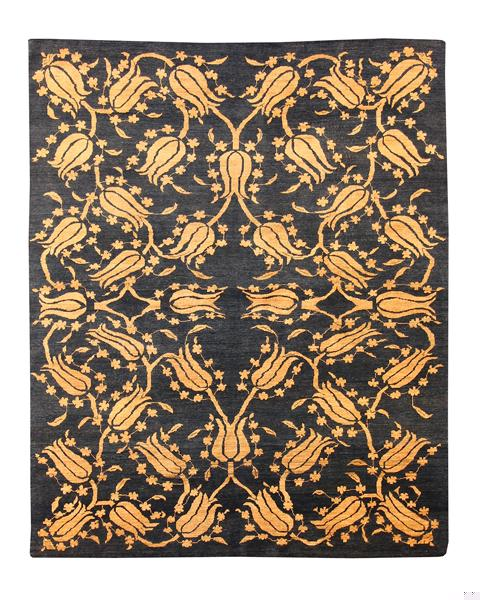

In [29]:
# inspect result
idx = 20
successes = list(res.keys())
image_name = successes[idx]
Image.open(f"rug_jpeg/{image_name}")

In [30]:
print("gpt4 inference is")
res[image_name]

gpt4 inference is


{'shape': 'rectangle',
 'dominant_colors': ['black', 'gold'],
 'style': 'traditional',
 'description': 'This traditional rug features an intricate floral pattern with a symmetrical arrangement. It contains a contrasting color scheme that emphasizes the design, perfect for adding a touch of elegance to any room.',
 'material': 'wool',
 'suggested_title': 'Elegant Traditional Floral Rug',
 'theme': 'floral'}